### Proyecto Curso

#### Cargamos los Datos que vamos a utilizar para el modelo

El Dataset contendrá la siguiente información:
* **SalePrice:** The property's sale price in dollars. This is the target variable that you're trying to predict.
* **OverallQual:** Overall material and finish quality, rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
* **1stFlrSF:** First Floor square feet
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **YearBuilt:** Original construction date
* **LotFrontage:** Linear feet of street connected to property

In [9]:
import numpy as np

House_Data = np.load('proyecto_data/proyecto_training_data.npy')

##Verificamos que haya cargado la información, y que tenga la forma requerida
print('Rango Tensor:',House_Data.ndim)
print('Forma Tensor:',House_Data.shape)
print('Vemos Primer Registro:',House_Data[0])

Rango Tensor: 2
Forma Tensor: (1460, 6)
Vemos Primer Registro: [2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]


#### Separara Datos de Entrenamiento y Pruebas

Usamos sclicing con NumPy separar los datos en 2 datasets:
* Entrenamiento(80%)
* Validación y pruebas(20%) 

In [19]:
filas,columnas = House_Data.shape
registros_Training = int(round(filas*0.80,0))
data_Training = House_Data[:registros_Training]
data_Test = House_Data[registros_Training:]
print('Cantidad Registros Training:',data_Training.shape[0])
print('Cantidad Registros Test:',data_Test.shape[0])

Cantidad Registros Training: 1168
Cantidad Registros Test: 292


### Análisis Exploratorio Datos

Para cada variable en el dataset calcularemos:
* media
* valor máximo
* valor mínimo 
* rango(peak to peak)
* desviación estándar 

In [48]:
## Variable - SalePrice
print('Datos Estadisticos Variable SalesPrice')
print('Media:',np.mean(House_Data[:,0]))
print('Valor Máximo:',np.max(House_Data[:,0]))
print('Valor Minimo:',np.min(House_Data[:,0]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,0]))
print('Desviación Estándar:',np.std(House_Data[:,0]))      
print('=======================================')

## Variable OverallQual:
print('Datos Estadisticos Variable OverallQual')
print('Media:',np.mean(House_Data[:,1]))
print('Valor Máximo:',np.max(House_Data[:,1]))
print('Valor Minimo:',np.min(House_Data[:,1]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,1]))
print('Desviación Estándar:',np.std(House_Data[:,1]))       
print('=======================================')

## Variable 1stFlrSF:
print('Datos Estadisticos Variable 1stFlrSF')
print('Media:',np.mean(House_Data[:,2]))
print('Valor Máximo:',np.max(House_Data[:,2]))
print('Valor Minimo:',np.min(House_Data[:,2]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,2]))
print('Desviación Estándar:',np.std(House_Data[:,2]))       
print('=======================================')

## Variable TotRmsAbvGrd:
print('Datos Estadisticos Variable TotRmsAbvGrd')
print('Media:',np.mean(House_Data[:,3]))
print('Valor Máximo:',np.max(House_Data[:,3]))
print('Valor Minimo:',np.min(House_Data[:,3]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,3]))
print('Desviación Estándar:',np.std(House_Data[:,3]))       
print('=======================================')

## Variable YearBuilt:
print('Datos Estadisticos Variable YearBuilt')
print('Media:',np.mean(House_Data[:,4]))
print('Valor Máximo:',np.max(House_Data[:,4]))
print('Valor Minimo:',np.min(House_Data[:,4]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,4]))
print('Desviación Estándar:',np.std(House_Data[:,4]))       
print('=======================================')

## Variable LotFrontage:
print('Datos Estadisticos Variable LotFrontage')
print('Media:',np.nanmean(House_Data[:,5]))
print('Valor Máximo:',np.nanmax(House_Data[:,5]))
print('Valor Minimo:',np.nanmin(House_Data[:,5]))
## NO encontre en Numpy una función que pudiera manejar el Rango con Nan, así que se hace manual
print('Rango (Peak to Peak):',np.nanmax(House_Data[:,5]-np.nanmin(House_Data[:,5])))
print('Desviación Estándar:',np.nanstd(House_Data[:,5]))       
print('=======================================')

Datos Estadisticos Variable SalesPrice
Media: 180921.19589041095
Valor Máximo: 755000.0
Valor Minimo: 34900.0
Rango (Peak to Peak): 720100.0
Desviación Estándar: 79415.29188606751
Datos Estadisticos Variable OverallQual
Media: 6.0993150684931505
Valor Máximo: 10.0
Valor Minimo: 1.0
Rango (Peak to Peak): 9.0
Desviación Estándar: 1.3825228366585953
Datos Estadisticos Variable 1stFlrSF
Media: 1162.626712328767
Valor Máximo: 4692.0
Valor Minimo: 334.0
Rango (Peak to Peak): 4358.0
Desviación Estándar: 386.45532230228963
Datos Estadisticos Variable TotRmsAbvGrd
Media: 6.517808219178082
Valor Máximo: 14.0
Valor Minimo: 2.0
Rango (Peak to Peak): 12.0
Desviación Estándar: 1.624836553698191
Datos Estadisticos Variable YearBuilt
Media: 1971.267808219178
Valor Máximo: 2010.0
Valor Minimo: 1872.0
Rango (Peak to Peak): 138.0
Desviación Estándar: 30.192558810489448
Datos Estadisticos Variable LotFrontage
Media: 70.04995836802665
Valor Máximo: 313.0
Valor Minimo: 21.0
Rango (Peak to Peak): 292.0
Desvi

#### Histograma de cada Variable

Para cada variable en el dataset se usará seaborn para graficar un histograma de la variable.

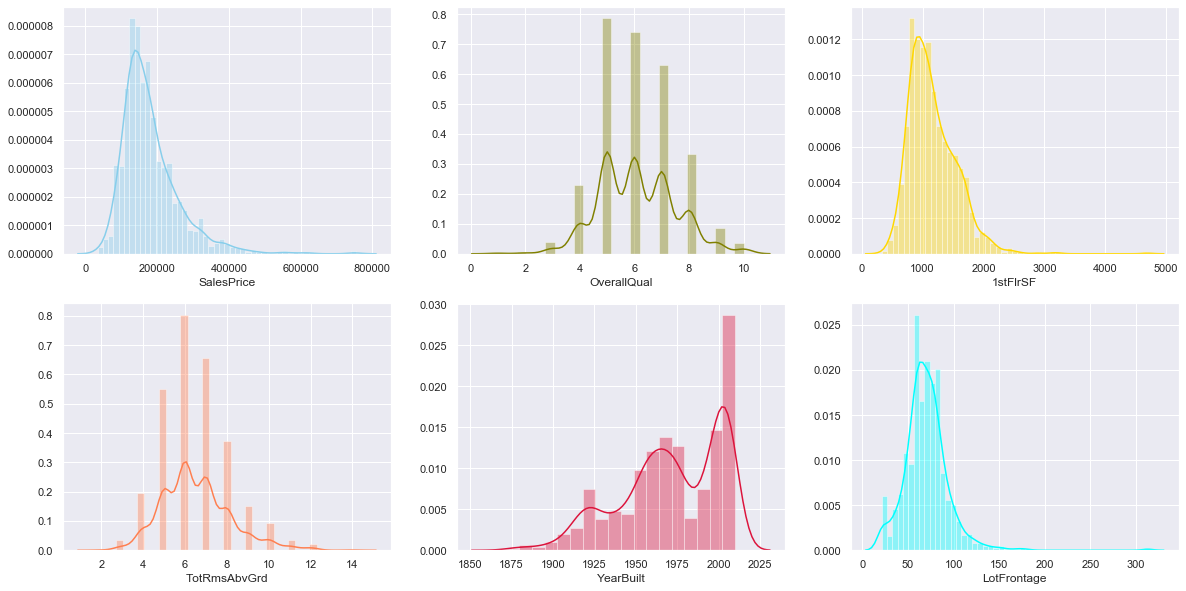

In [66]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=False)
sns.distplot( House_Data[:,0] , color="skyblue", ax=axes[0, 0],axlabel="SalesPrice")
sns.distplot( House_Data[:,1] , color="olive", ax=axes[0, 1],axlabel="OverallQual")
sns.distplot( House_Data[:,2] , color="gold", ax=axes[0, 2],axlabel="1stFlrSF")
sns.distplot( House_Data[:,3] , color="coral", ax=axes[1, 0],axlabel="TotRmsAbvGrd")
sns.distplot( House_Data[:,4] , color="crimson", ax=axes[1, 1],axlabel="YearBuilt")
sns.distplot( House_Data[:,5] , color="cyan", ax=axes[1, 2],axlabel="LotFrontage")

#### Análisis de Correlación entre variables

##### Variable - OverallQual
* Calcular el coeficiente de correlación entre x y y
* Graficar x vs y(scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 


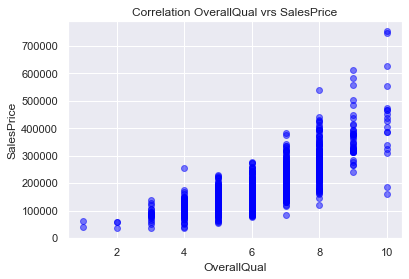

In [69]:
##Efectuamos scatterplot de la Variable
x = House_Data[:,1] ## OverallQual
y = House_Data[:,0] ##Esta es la variable que tratamos de Predecir #SalesPrice

plt.scatter(x, y, c="blue", alpha=0.5)
plt.title('Correlation OverallQual vrs SalesPrice')
plt.xlabel('OverallQual')
plt.ylabel('SalesPrice')
plt.show()

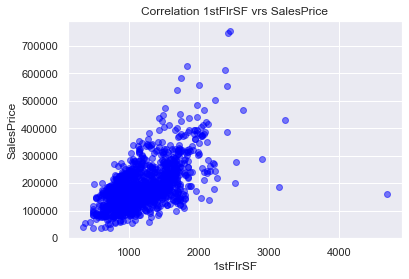

In [70]:
##Efectuamos scatterplot de la Variable
x = House_Data[:,2] ## 1stFlrSF
y = House_Data[:,0] ##Esta es la variable que tratamos de Predecir #SalesPrice

plt.scatter(x, y, c="blue", alpha=0.5)
plt.title('Correlation 1stFlrSF vrs SalesPrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalesPrice')
plt.show()

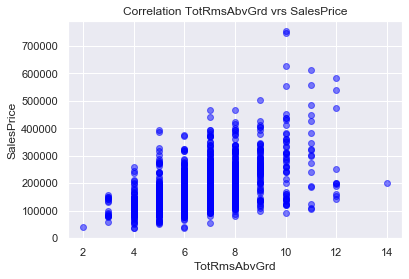

In [71]:
##Efectuamos scatterplot de la Variable
x = House_Data[:,3] ## TotRmsAbvGrd
y = House_Data[:,0] ##Esta es la variable que tratamos de Predecir #SalesPrice

plt.scatter(x, y, c="blue", alpha=0.5)
plt.title('Correlation TotRmsAbvGrd vrs SalesPrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalesPrice')
plt.show()

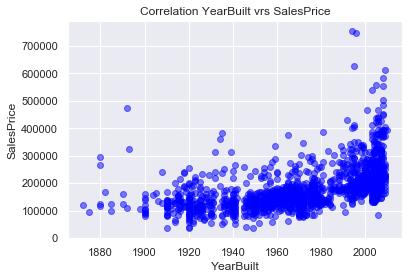

In [72]:
##Efectuamos scatterplot de la Variable
x = House_Data[:,4] ## YearBuilt
y = House_Data[:,0] ##Esta es la variable que tratamos de Predecir #SalesPrice

plt.scatter(x, y, c="blue", alpha=0.5)
plt.title('Correlation YearBuilt vrs SalesPrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalesPrice')
plt.show()

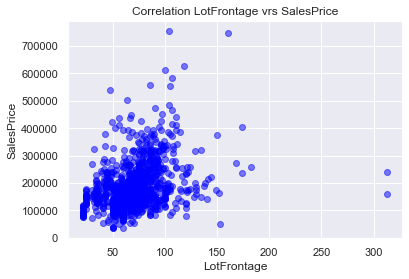

In [73]:
##Efectuamos scatterplot de la Variable
x = House_Data[:,5] ## LotFrontage
y = House_Data[:,0] ##Esta es la variable que tratamos de Predecir #SalesPrice

plt.scatter(x, y, c="blue", alpha=0.5)
plt.title('Correlation LotFrontage vrs SalesPrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalesPrice')
plt.show()